
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 5 - BONUS - SECTION-B (5.30pm to 7pm class)</p>
## <p style="text-align: center;">Points: 95, Bonus: 40 </p>
## <p style="text-align: center;">Due: November 30, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Jocelyne Walker (EID- jvw359)
2. Shruti Kolhatkar (EID-sgk637)

# Question 1 : Bayesian Belief Networks (15 pts)

![Question 1](https://i.imgur.com/3ayVbFi.jpeg) 

All nodes are binary and can take 0/1 values

The probabilities are given below:

P(Bark = 1) = 0.05   
P(Rain = 1) = 0.01


P(Scared = 1 | Bark = 0, Rain = 0) = 0.001  
P(Scared = 1 | Bark = 0, Rain = 1) = 0.1  
P(Scared = 1 | Bark = 1, Rain = 0) = 0.8  
P(Scared = 1 | Bark = 1, Rain = 1) = 0.9  

P(Hides = 1 | Scared = 1) = 0.95  
P(Hides = 1 | Scared = 0) = 0.05  

For the given Bayesian network, Compute the following probabilities :  


**(a) (4 pts)** Find the probability that cat hides = 1.  
**(b) (4 pts)** Given that cat got scared (Scared = 1), what is the probability that it rained (Rain = 1)?  
**(c) (7 pts)** Given that cat got scared (Scared = 1) and the dog barked (Bark = 1), what is the probability that it rained (Rain = 1)?

**Part A**

![](https://imgur.com/S7CcQOm.png)
![](https://imgur.com/4gzKMi0.png)

**Part B**

![](https://imgur.com/hJqsoJf.png)

**Part C**

![](https://imgur.com/JbEcPbZ.png)

# Question 2 - **Random Forest (30 pts)**  

The goal of this problem is to explore the effect of feature selection using  the following dataset (same as in HW 4) https://www.kaggle.com/wendykan/lending-club-loan-data

Since the dataset is really huge, we will use only a certain set of features and samples to build our model. We will also use only two classes instead of all.

The modified dataset with reduced number of samples has been prepared for your use. The file can be downloaded using the code below. You can also find it [here](https://drive.google.com/file/d/1Gv_N1rHLqDizxUck6l06BfniR30Pw0Zs/view?usp=sharing) in case you have a different environment and this code does not run.



In [ ]:
%%bash
ggID='1Gv_N1rHLqDizxUck6l06BfniR30Pw0Zs'  
ggURL='https://drive.google.com/uc?export=download'  
filename="$(curl -sc /tmp/gcokie "${ggURL}&id=${ggID}" | grep -o '="uc-name.*</span>' | sed 's/.*">//;s/<.a> .*//')"  
getcode="$(awk '/_warning_/ {print $NF}' /tmp/gcokie)"  

if [ -e "${filename}" ]; then
    echo 'File already exists'
else
    curl -Lb /tmp/gcokie "${ggURL}&confirm=${getcode}&id=${ggID}" -o "${filename}"  
fi

Couldn't find program: 'bash'


In [1]:
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('loan.csv')
df = dataset.fillna(0)

def LoanResult(status):
    if (status == 'Fully Paid') or (status == 'Current'):
        return 1
    else:
        return 0

df['loan_status'] = df['loan_status'].apply(LoanResult)

df = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
             'emp_length', 'home_ownership','annual_inc', 'verification_status', 'loan_status',
             'purpose','addr_state', 'dti','open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
             'initial_list_status', 'recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
             'application_type', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal', 'chargeoff_within_12_mths',
             'pub_rec_bankruptcies', 'tax_liens', 'debt_settlement_flag']]
df_cat = df.select_dtypes(exclude=['int64', 'float64'])
df = pd.get_dummies(df, df_cat.columns.values)
df.head()


C:\Users\jocel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,...,last_pymnt_d_Feb-2019,last_pymnt_d_Jan-2019,last_pymnt_d_Jul-2018,last_pymnt_d_Nov-2018,last_pymnt_d_Oct-2018,last_pymnt_d_Sep-2018,application_type_Individual,application_type_Joint App,debt_settlement_flag_N,debt_settlement_flag_Y
0,2500,2500,2500.0,13.56,84.92,55000.0,1,18.24,9.0,1.0,...,1,0,0,0,0,0,1,0,1,0
1,30000,30000,30000.0,18.94,777.23,90000.0,1,26.52,13.0,1.0,...,1,0,0,0,0,0,1,0,1,0
2,5000,5000,5000.0,17.97,180.69,59280.0,1,10.51,8.0,0.0,...,1,0,0,0,0,0,1,0,1,0
3,4000,4000,4000.0,18.94,146.51,92000.0,1,16.74,10.0,0.0,...,1,0,0,0,0,0,1,0,1,0
4,30000,30000,30000.0,16.14,731.78,57250.0,1,26.35,12.0,0.0,...,1,0,0,0,0,0,1,0,1,0


Select the `loan_status` column as the target column.  


**Part 1: (3 pts)** Split the dataset into train and test set with 25% data in test set and random_state = 42. Perform [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) on the dataset. Print the total number of features. 

**Part 2: (5 pts)** Use the dataset to create a `RandomForestClassifier(n_estimators=5, random_state=42)` model and print the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to show the precision, recall and F1 score based on the test set.  

**Part 3: (6 pts)** Use [$\chi^2$ test](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html) to select the top 100, 30 and 10 features using [SelectKBest](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection) module. Train a random forest model and print the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for each of the trained models.  

**Note:** $\chi^2$ test requires non-negative values only for all features. Since we have performed Min-Max scaling previously (where the default behavior is to scale features between 0 and 1, there should not be any problem performing this test.)   

**Part 4: (6 pts)** [Plot the ROC curves](https://github.com/justmarkham/scikit-learn-tips/blob/master/notebooks/21_plot_roc_curve.ipynb) for all of the 4 models.  

**Part 5: (8 pts)** Plot the feature importance for each of the 4 random forest models that you have trained to show the top 5 features. ([Get feature names after feature selection](https://stackoverflow.com/a/43765224), [Plot feature importance using Pandas and matplotlib](https://stackoverflow.com/a/51520906))  

**Part 6: (2 pts)** What do you observe from the ROC curves?

# Solution

**Part 1**

In [2]:
from sklearn.preprocessing import MinMaxScaler

y = df['loan_status'].values
X = df.drop(['loan_status'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=42)
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#there are 160 features in the data
X_train.shape

(169550, 160)

**Part 2**

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf_a = RandomForestClassifier(n_estimators=5, random_state=42)
m2_2 = clf_a.fit(X_train, y_train)
pred2_2 = clf_a.predict(X_train)
pred2_2_test = clf_a.predict(X_test)

print("Test Set Classification Report\n")
print(classification_report(y_test, pred2_2_test))

Test Set Classification Report

              precision    recall  f1-score   support

           0       0.63      0.37      0.46       850
           1       0.99      1.00      0.99     55667

    accuracy                           0.99     56517
   macro avg       0.81      0.68      0.73     56517
weighted avg       0.98      0.99      0.99     56517



**Part 3**

In [4]:
from sklearn.feature_selection import chi2, SelectKBest

#100
k_100 = SelectKBest(chi2, k=100)
X_train_100 = k_100.fit_transform(X_train,y_train)
X_test_100 = k_100.transform(X_test)

clf_b = RandomForestClassifier(n_estimators=5, random_state=42)
m2_100 = clf_b.fit(X_train_100, y_train)
pred2_2 = clf_b.predict(X_train_100)
pred2_2_test = clf_b.predict(X_test_100)

print("Test Set Classification Report\n")
print(classification_report(y_test, pred2_2_test))


#30
k_30 = SelectKBest(chi2, k=30)
X_train_30 = k_30.fit_transform(X_train,y_train)
X_test_30 = k_30.transform(X_test)

clf_c = RandomForestClassifier(n_estimators=5, random_state=42)
m2_30 = clf_c.fit(X_train_30, y_train)
pred2_2 = clf_c.predict(X_train_30)
pred2_2_test = clf_c.predict(X_test_30)

print("Test Set Classification Report\n")
print(classification_report(y_test, pred2_2_test))


#10
k_10 = SelectKBest(chi2, k=10)
X_train_10 = k_10.fit_transform(X_train,y_train)
X_test_10 = k_10.transform(X_test)

clf_d = RandomForestClassifier(n_estimators=5, random_state=42)
m2_10 = clf_d.fit(X_train_10, y_train)
pred2_2 = clf_d.predict(X_train_10)
pred2_2_test = clf_d.predict(X_test_10)

print("Test Set Classification Report\n")
print(classification_report(y_test, pred2_2_test))

Test Set Classification Report

              precision    recall  f1-score   support

           0       0.65      0.45      0.53       850
           1       0.99      1.00      0.99     55667

    accuracy                           0.99     56517
   macro avg       0.82      0.72      0.76     56517
weighted avg       0.99      0.99      0.99     56517

Test Set Classification Report

              precision    recall  f1-score   support

           0       0.49      0.13      0.21       850
           1       0.99      1.00      0.99     55667

    accuracy                           0.98     56517
   macro avg       0.74      0.56      0.60     56517
weighted avg       0.98      0.98      0.98     56517

Test Set Classification Report

              precision    recall  f1-score   support

           0       1.00      0.07      0.14       850
           1       0.99      1.00      0.99     55667

    accuracy                           0.99     56517
   macro avg       0.99      0.5

**Part 4**

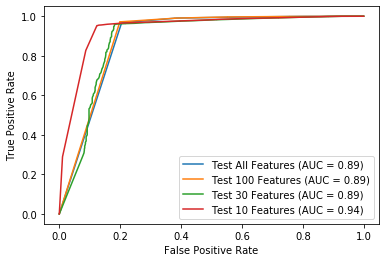

In [6]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(clf_a, X_test, y_test, name = "Test All Features")
plot_roc_curve(clf_b, X_test_100, y_test, ax = disp.ax_, name = "Test 100 Features");
plot_roc_curve(clf_c, X_test_30, y_test, ax = disp.ax_, name = "Test 30 Features");
plot_roc_curve(clf_d, X_test_10, y_test, ax = disp.ax_, name = "Test 10 Features")

**Part 5**

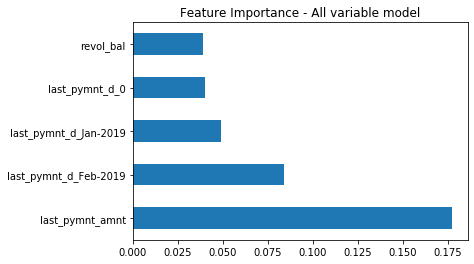

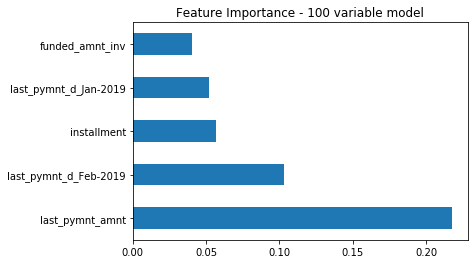

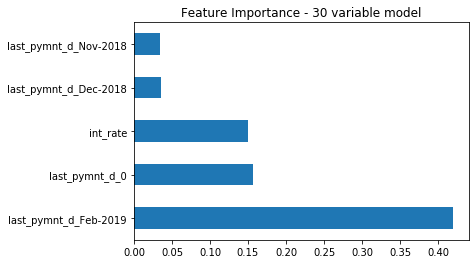

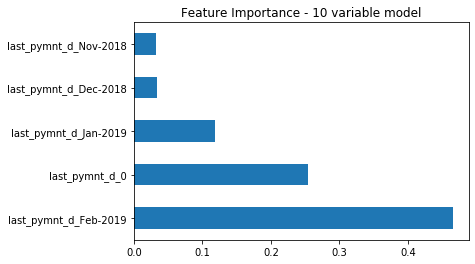

In [ ]:
import matplotlib.pyplot as plt

#all features
X_train = pd.DataFrame(data=X_train, columns=X.columns)
X_test = pd.DataFrame(data=X_test, columns=X.columns)
feat_importances = pd.Series(clf_a.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind="barh")
plt.title("Feature Importance - All variable model")
plt.show()

#100
X_train = pd.DataFrame(data=X_train, columns=X.columns)
X_test = pd.DataFrame(data=X_test, columns=X.columns)
cols = k_100.get_support(indices=True)
X_train_100 = X_train.iloc[:,cols]
feat_importances = pd.Series(clf_b.feature_importances_, index=X_train_100.columns)
feat_importances.nlargest(5).plot(kind="barh")
plt.title("Feature Importance - 100 variable model")
plt.show()

#30
X_train = pd.DataFrame(data=X_train, columns=X.columns)
X_test = pd.DataFrame(data=X_test, columns=X.columns)
cols = k_30.get_support(indices=True)
X_train_30 = X_train.iloc[:,cols]
feat_importances = pd.Series(clf_c.feature_importances_, index=X_train_30.columns)
feat_importances.nlargest(5).plot(kind="barh")
plt.title("Feature Importance - 30 variable model")
plt.show()

#10
X_train = pd.DataFrame(data=X_train, columns=X.columns)
X_test = pd.DataFrame(data=X_test, columns=X.columns)
cols = k_10.get_support(indices=True)
X_train_10 = X_train.iloc[:,cols]
feat_importances = pd.Series(clf_d.feature_importances_, index=X_train_10.columns)
feat_importances.nlargest(5).plot(kind="barh")
plt.title("Feature Importance - 10 variable model")
plt.show()

**Part 6**

What do you observe from the ROC curves?

From the ROC curves, we see that the model with the 10 variables performs the best. We gain prediction value when simplyfying to the 10 most important attributes. The prediction strength is slightly worse on the models with the 30, 100 predictors and again slightly on the model with all the predictors. 

The ones with the more attributes are overfitting to the training data. 

# Question 3 : Logistic Regression with Regularization and Decision Tree (25 pts)

The goal of this problem is to explore the effect of regularization on logistic regression for binary classification, we will be using the diabetes dataset. 
This dataset is used to predict if a person is having 
diabetes based on feature variables including blood pressure, bmi, age etc. The target variable is stored in "outcome" column.

* Load the "diabetes.csv" and partition it into features (X) and the target label (y) for classification task. Then, use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split data into training and testing: test_size=0.33, random_state=42. 


* We need to use [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature. Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y. 

   Note: X should have 8 features.


**Part 1: (6 pts)** Fit a [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model with penalty $l2$
(Ridge Regularization) for the following values of regularization  C = $[0.0001,0.001,0.1,10,100]$ using the training data. Report the accuracy score on the test data averaged over 5 runs of the model for each of the C values. 

  Note : Smaller values of C indicate stronger regularization

    

**Part 2: (6 pts)** Fit a [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) classifier on the training data, and report the accuracy score on the test data averaged over 5 runs. Briefly explain which of the models performed the best Logistic Regression + regularization or Decision Tree Classifier and why. 


* Now, We will check if the decision boundary from logistic regression is linear by using a 2D plot.


**Part 3: (4 pts)** Select the top two most important features ([Feature importance](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)) using the training data with a Decision Tree Classifier and random_state = 10. Subset the train and test data to have only the selected features. This will be used as the training and test data for part $4$.


**Part 4: (8 pts)** Fit a [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model with penalty = $l2$, C = 10 (Ridge Regularization) and random state = 0 for the training data from part $3$ . Plot the decision boundary of the logistic regression model with the two features, as X and Y axis. Here is an [example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html) . Plot the scatter points for the test data, on the same graph showing the two classes as two different color. 

  * Hint : You can use the below limits for plotting the decision boundary, where $X[:,0]$ indicates feature 1 values and $X[:,1]$ indicates feature 2 values of the train dataset. 

     $ x_\min, x_\max = X[:, 0].min() - .5, X[:, 0].max() + .5 $ 

     $ y_\min, y_\max = X[:, 1].min() - .5, X[:, 1].max() + .5 $
   

# Solution

#### Loading dataset and pre-processing (**1 pt**)

In [ ]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('diabetes.csv')

y = df['Outcome'].values
X = df.drop(['Outcome'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Part 1 (**6 pts**)

In [ ]:
from sklearn.linear_model import LogisticRegression
import statistics 

C = [0.0001, 0.001, 0.1, 10, 100]
scores = []
for c in C: 
    clf = LogisticRegression(penalty = 'l2', C = c).fit(X_train, y_train)
    print("C =", c, " \nAccuracy:",clf.score(X_test, y_test),'\n')
    scores.append(clf.score(X_test, y_test))
    
print("average accuracy score: ",statistics.mean(scores))

C = 0.0001  
Accuracy: 0.6614173228346457 

C = 0.001  
Accuracy: 0.6614173228346457 

C = 0.1  
Accuracy: 0.7440944881889764 

C = 10  
Accuracy: 0.7480314960629921 

C = 100  
Accuracy: 0.7480314960629921 

average accuracy score:  0.7125984251968505


#### Part 2 (**6 pts**)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

scores = []

for c in range(5): 
    clf = DecisionTreeClassifier().fit(X_train, y_train)
    print("Round =", c+1, " \nAccuracy:",clf.score(X_test, y_test),'\n')
    scores.append(clf.score(X_test, y_test))
    
print("average accuracy score: ",statistics.mean(scores))

Round = 1  
Accuracy: 0.7125984251968503 

Round = 2  
Accuracy: 0.7047244094488189 

Round = 3  
Accuracy: 0.7086614173228346 

Round = 4  
Accuracy: 0.7047244094488189 

Round = 5  
Accuracy: 0.7125984251968503 

average accuracy score:  0.7086614173228346


The logistic regression with regularization berformed better than the decision tree classifier. The less regularization of the model, the higher the testing accuracy score. This is showing that our logistic regression that's including more features in the model is performing better than the tree model, which likely means that the data is linearly separable in space. Logistic regression makes this assumption, while instead the decision tree might be overfitting the data in a non-linear fashion.

#### Part 3 (**4 pts**)

In [ ]:
clf = DecisionTreeClassifier(random_state=10).fit(X_train, y_train)

feat_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)[:2]
cols = feat_importances.index.values

X_train = pd.DataFrame(data=X_train, columns=X.columns)
X_test = pd.DataFrame(data=X_test, columns=X.columns)

X_train_update = X_train.loc[:,cols]
X_test_update = X_test.loc[:,cols]

X_train_update.head()

,Glucose,BMI
0,-0.194751,-1.042935
1,0.640463,-0.414806
2,-0.163817,-1.291569
3,0.145522,-0.244688
4,-1.339304,0.069376


#### Part 4 (**8 pts**)

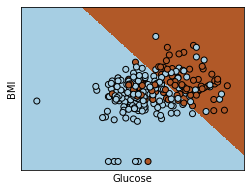

In [ ]:
clf = LogisticRegression(penalty = 'l2', C = 10, random_state = 0).fit(X_train_update, y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train_update.iloc[:, 0].min() - .5, X_train_update.iloc[:, 0].max() + .5
y_min, y_max = X_train_update.iloc[:, 1].min() - .5, X_train_update.iloc[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the testing points
plt.scatter(X_test_update.iloc[:, 0], X_test_update.iloc[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Glucose')
plt.ylabel('BMI')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

# Question 4 - Comparison of different ensembles method for classification (25 pts)

In this question, we will compare performance of different ensemble methods for classification problems: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), [GradientBoosting](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) Classifiers.

[Spam Classification Data](https://archive.ics.uci.edu/ml/datasets/Spambase) of UCI will be used (you can use the data provided: 'spam_uci.csv'). Don't worry about column names. The last column represents target label, 1 if spam and zero otherwise.

* Load the data and partition it into features (X) and the target label (y) for classification task. Then, use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split data into training and testing: test_size=0.33, random_state=42. 



**Part 1: (4 pts)** Use a Decision Tree Classifier with random_state = 10 and Logistic Regression with random_state = 10 and solver ="lbfgs" for the spam classification problem. Report the accuracy_score and roc_auc_score on the test data for each classifier.


**Part 2: (8 pts)** Create an ensemble of 50 classifiers (i.e n_estimators = 50) with random_state = 10 for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) with base classifier as Decision Tree Classifier and Logistic Regression from part $1$ . Report accuracy_score and roc_auc_score on the test data for both the Bagging classifiers. Compare the results and breifly explain the effect of using bagging for the spam classification problem for both the Logistic Regression and Decision Tree base classifier.


* Now we will look at the effect of other ensemble methods on this problem.


**Part 3: (5 pts)** Use a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to classify whether an email is spam. Report your testing accuracy ([accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score). You will need [predict_proba](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) for roc_auc_score. 


**Part 4: (5 pts)** Use [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for the spam classification problem.  Report  accuracy_score and roc_auc_score on the test data for each algorithm. 

  Note : For part 3 and 4 find the best values for the hyper parameters of each of the models by using GridSearchCV. 


**Part 5: (3 pts)** Briefly explain which of the three ensemble method above from Part 3&4 performed the best and why?


# Solution

#### Loading and pre-processing dataset

In [1]:
#COLAB placeholder for feeding data in colab
#import pandas as pd
#from google.colab import files
#import io
#from google.colab import  drive

#uploaded = files.upload()

#df = pd.read_csv(io.BytesIO(uploaded['spam_uci.csv']), index_col = 0)
#df.head()

Saving spam_uci.csv to spam_uci.csv


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [2]:
import pandas as pd

df = pd.read_csv('spam_uci.csv', index_col = 0)

from sklearn.model_selection import train_test_split

y = df['57'].values
X = df.drop(['57'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

#### Part 1 (**4 pts**)

In [5]:
from sklearn.metrics import roc_auc_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

clf_DT = DecisionTreeClassifier(random_state=10).fit(X_train, y_train)
y_pred = clf_DT.predict(X_test)
print("DT accuracy score: ",clf_DT.score(X_test,y_test))
print("DT roc_auc score: ",roc_auc_score(y_test,y_pred))

clf_LR = LogisticRegression(random_state=10, solver='lbfgs', max_iter=10000).fit(X_train, y_train)
y_pred = clf_LR.predict(X_test)
print("\nLR accuracy score: ", clf_LR.score(X_test,y_test))
print("LR roc_auc score: ",roc_auc_score(y_test,y_pred))

DT accuracy score:  0.9117840684660962
DT roc_auc score:  0.9085903594264297

LR accuracy score:  0.9308755760368663
LR roc_auc score:  0.9260838245625297


#### Part 2 (**8 pts**)

In [6]:
from sklearn.ensemble import BaggingClassifier

clf_DT = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=10).fit(X_train, y_train)
y_pred = clf_DT.predict(X_test)
print("DT accuracy score: ",clf_DT.score(X_test,y_test))
print("DT roc_auc score: ",roc_auc_score(y_test,y_pred))

clf_LR = BaggingClassifier(base_estimator=LogisticRegression(solver='lbfgs',max_iter=10000), n_estimators=50, random_state=10).fit(X_train, y_train)
y_pred = clf_LR.predict(X_test)
print("\nLR accuracy score: ", clf_LR.score(X_test,y_test))
print("LR roc_auc score: ",roc_auc_score(y_test,y_pred))

DT accuracy score:  0.9440421329822252
DT roc_auc score:  0.9403027255642449

LR accuracy score:  0.9335088874259381
LR roc_auc score:  0.9292433822244569


Without bagging, the logistic regression performs better than the decision tree. However, once we include bagging, the decision tree accuracy jumps from about 0.9 to 0.94, while the logistic regression accuracy stays at about 0.93. This means that the bagging improved the decision tree forecast by adding together the knowledge of many different trees and aggregating the random samples.

#### Part 3 (**5 pts**)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

clf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)
clf_RF = clf_cv.fit(X_train, y_train)
y_pred_0 = clf_RF.predict(X_test)
y_pred = clf_RF.predict_proba(X_test)[:,1]

print("RF accuracy score:",clf_RF.score(X_test,y_test))
print("RF accuracy score:",accuracy_score(y_test,y_pred_0))

print("RF roc_auc score: ",roc_auc_score(y_test,y_pred))

RF accuracy score: 0.9407504937458855
RF accuracy score: 0.9407504937458855
RF roc_auc score:  0.9847085967783923


#### Part 4 (**5 pts**)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import numpy as np 

#Gradient Boosting Classifier
param_grid = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "n_estimators":[10, 50, 300]
    }

clf_cv = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=3)
clf_GBC = clf_cv.fit(X_train, y_train)
y_pred = clf_GBC.predict_proba(X_test)[:,1]

print("Gradient boosting accuracy score:",clf_GBC.score(X_test,y_test))
print("Gradient boosting roc_auc score:",roc_auc_score(y_test,y_pred))

Gradient boosting accuracy score: 0.9545753785385122
Gradient boosting roc_auc score: 0.9887525452982859


In [10]:
#Ada Boost Classifier
params = {
     'n_estimators': [10, 50, 300],
     'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
 }

clf_cv = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid, cv=3)
clf_ABC = clf_cv.fit(X_train, y_train)
y_pred = clf_ABC.predict_proba(X_test)[:,1]

print("Ada boost accuracy score:",clf_ABC.score(X_test,y_test))
print("Ada boost roc_auc score:",roc_auc_score(y_test,y_pred))


Ada boost accuracy score: 0.9499670836076366
Ada boost roc_auc score: 0.9864176464504901


#### Part 5 (**3 pts**)

Of the models from parts 3 and 4, the gradient boosting classifier performed the best. It was better than the random forest because our gradient boosting combines the trees one at a time, rather than building each tree independently like random forest. 

Gradient boosting and ada boost performed very similarly, but gradient boosting was slightly better. They use different loss functions. While gradient boosting is much more flexible, Adaboost identifies shortcomings focusing on specific higher weight points. The more flexible method of gradient boosting performs slightly better in this case.

Sources: 
https://www.datasciencecentral.com/profiles/blogs/decision-tree-vs-random-forest-vs-boosted-trees-explained
https://datascience.stackexchange.com/questions/39193/adaboost-vs-gradient-boosting


# Question 5 (Bonus): Segmenting Customers for Predicting Credit Card Fraud (40 points)

In this question, we will look at a technique to segment customers using SHAP (SHapley Additive exPlanations). Please read this article to learn about SHAP - https://christophm.github.io/interpretable-ml-book/shap.html.

SHAP values provide an explanation for each observation in terms of feature attribution (which features were most influential in determining the predicted value for that observation).

For some applications, that may be too fine a resolution, and one would rather identify subsets of observations (called segments or clusters) for which the “explanations are similar”, Moreover, it helps if subsets are also “understandable”, i.e. easy to describe in terms of the feature values. Then the subsets become “actionable”, as one can design specific interventions (e.g. targeted marketing messages) for each subset.

The goal of this problem is to identify such segments, and see if the variation of SHAP values within each segment is indeed lower than the variation in the total population. We will proceed as follows:

1. First, we will fit an XGBoost model to perform the classification task.
2. We will then use the shap.TreeExplainer which uses Tree SHAP algorithms and estimate the SHAP values for each observation.
3. Our objective is to segment customers into groups which have low variance in the SHAP values - these represent segments of similar customers in the “feature attribution based explanation” space. We will do this as follows:  

    a. Cluster the SHAP values using KMeans clustering. You pick K, perhaps somewhere between 10 and 20.  
    b. Build a decision tree with the Cluster numbers as the labels. Specify the number of leaves to be in the range of [K, 2K].  Due to the choice of the surrogate class labels provided by the clustering, the   leaves of the decision tree will be encouraged to have similar SHAP values. Moreover, since you are learning a decision tree, these leaves are also simple to describe as rules. A good solution will be indicated if  for each of these leaves,  the variance of SHAP values of observations mapped to that leaf will be lower than the  overall variance.  


In [1]:
#LOADING DATA -  DONOT CHANGE

import re
import pandas as pd
import numpy as np
import shap
import time
import xgboost
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('credit.csv')

X = df
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df.columns.values]

X = X.drop(['Class'], axis=1)
Y = df['Class']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, shuffle=True, random_state=42)

### 5.1. Fit an XGBoost model on the train data and report the ROCAUC on the test set. (5pts)
### 5.2. Compute the SHAP values using the [TreeExplainer](https://shap.readthedocs.io/en/latest/generated/shap.TreeExplainer.html) and plot the [summary plot](https://shap.readthedocs.io/en/latest/generated/shap.summary_plot.html). Explain what the summary plot represents. (5 pts)
### 5.3. Perform KMeans clustering on the SHAP values inot $k$ clusters. Then, train a decision tree (with maximum depth $d$) to predict the cluster number obtained through KMeans -  the cluster numbers as the target. Visualize the decison tree (5 pts). Plot the variance of the SHAP values of the samples in each of the leaves - show that all these varinces is less than the overall variance of the SHAP values. The main parameters to tune here are the number of cluster $k$ and the maximum depth $d$. **(30 pts)**

**5.1**

In [31]:
X.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,54957,46706.0,-2.251673,1.883733,0.203996,0.285689,1.599910,5.768100,-2.436335,-4.188182,...,-0.902386,4.876496,-2.732574,0.621149,0.902121,0.308206,-0.338951,0.690041,0.229806,6.07
1,254618,156823.0,-6.366974,4.908582,-1.676553,2.633473,-2.070954,1.959843,-3.642810,-3.174741,...,-1.746416,5.971038,-0.995184,0.761710,-0.621929,-0.172272,0.011821,-1.780545,-0.260594,15.13
2,92840,64131.0,1.166478,-0.017263,0.582092,0.842173,-0.395025,-0.109601,-0.149612,-0.006015,...,-0.093147,-0.047810,0.161384,-0.074465,0.167908,0.534055,0.464273,0.003599,0.010511,14.99
3,179927,124296.0,1.665597,-0.914293,-0.718322,0.358974,-0.593724,-0.095321,-0.370331,0.113039,...,0.039299,-0.118245,-0.640672,0.201775,-0.626856,-0.515226,-0.660499,-0.008155,-0.022133,165.13
4,110231,71733.0,-0.359021,0.911878,1.010649,-0.455080,0.561774,0.178060,0.530635,0.207455,...,0.103494,-0.272653,-0.788422,-0.189945,-1.044773,-0.071264,0.138970,0.254857,0.095611,3.57


In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
import pandas as pd

model = XGBClassifier()
m = model.fit(X_train, y_train)
y_pred = m.predict(X_test)

print("ROCAUC on test set:",roc_auc_score(y_test, y_pred))

ROCAUC on test set: 0.9089502621148191


**5.2**

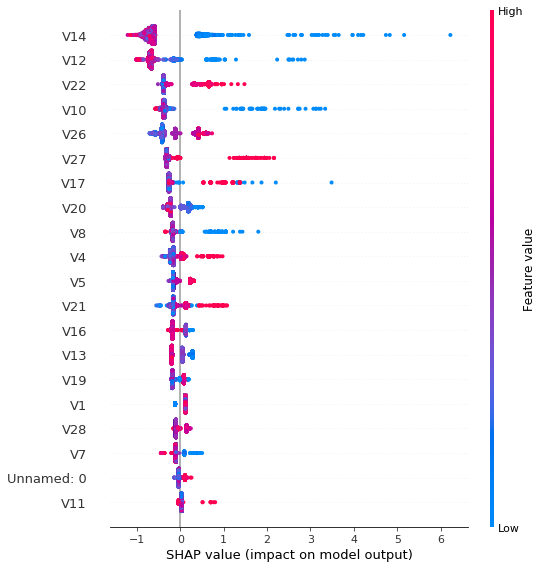

In [29]:
xgb_shap_values = shap.TreeExplainer(m).shap_values(X_test)

shap.summary_plot(xgb_shap_values, X_test)

The SHAP summary plot shows us a lot of different features of the model and the impact of the data on the model. The most important variables are shown first. V14 and V12 are the two most important features. We also see the impact of the values on the model output shown by their horizontal location. V14 is associated with a lower prediction, while V8 or V11 might be more likely to have a higher prediction. The red values are high, while the blue values are low. We see that V8 as a positive SHAP value and low feature value, meaning it is negatively correlated. On the other hand, V22 has a high SHAP value and high feature value, meaning it is positively correlated with the output.

**5.3a**

In [40]:
from sklearn.cluster import KMeans

X_train_shap_values = shap.TreeExplainer(m).shap_values(X_train)
X_train_val_shap_values = shap.TreeExplainer(m).shap_values(X_train_val)
X_test_shap_values = shap.TreeExplainer(m).shap_values(X_test)

# chose 15 for K
kmeans = KMeans(n_clusters=15, random_state=0).fit(X_train_shap_values)
y_train_pred = kmeans.predict(X_train_shap_values)
y_train_val_pred = kmeans.predict(X_train_val_shap_values)
y_test_pred = kmeans.predict(X_test_shap_values)

0        1
1        8
2        8
3        8
4        2
        ..
7116     9
7117     2
7118     8
7119    10
7120     0
Length: 7121, dtype: int32

In [57]:
import numpy as np
print("Variance of train shap values:", np.var(X_train_shap_values))
print("Variance of train val shap values:", np.var(X_train_val_shap_values))
print("Variance of test shap values:", np.var(X_test_shap_values))

Variance of train shap values: 0.05740502
Variance of train val shap values: 0.057417788
Variance of test shap values: 0.056843683


**5.3b**

[Text(3348.0, 978.48, 'X[27] <= 0.149\ngini = 0.869\nsamples = 16020\nvalue = [2341, 1363, 3066, 376, 41, 759, 834, 769, 3373, 1720\n355, 230, 28, 432, 333]'),
 Text(1674.0, 761.0400000000001, 'X[23] <= 0.302\ngini = 0.823\nsamples = 11466\nvalue = [2341, 1363, 0, 0, 34, 0, 834, 769, 3373, 1720, 258\n172, 15, 358, 229]'),
 Text(837.0, 543.6, 'X[21] <= -0.067\ngini = 0.763\nsamples = 8615\nvalue = [0, 1363, 0, 0, 32, 0, 834, 769, 3373, 1720, 202\n156, 8, 0, 158]'),
 Text(418.5, 326.1600000000001, 'X[11] <= -0.386\ngini = 0.431\nsamples = 4526\nvalue = [0, 2, 0, 0, 29, 0, 335, 497, 3355, 0, 108, 95\n6, 0, 99]'),
 Text(209.25, 108.72000000000003, 'gini = 0.512\nsamples = 732\nvalue = [0, 0, 0, 0, 20, 0, 1, 494, 0, 0, 45, 80, 0\n0, 92]'),
 Text(627.75, 108.72000000000003, 'gini = 0.21\nsamples = 3794\nvalue = [0, 2, 0, 0, 9, 0, 334, 3, 3355, 0, 63, 15, 6\n0, 7]'),
 Text(1255.5, 326.1600000000001, 'X[13] <= -0.298\ngini = 0.692\nsamples = 4089\nvalue = [0, 1361, 0, 0, 3, 0, 499, 272, 18, 17

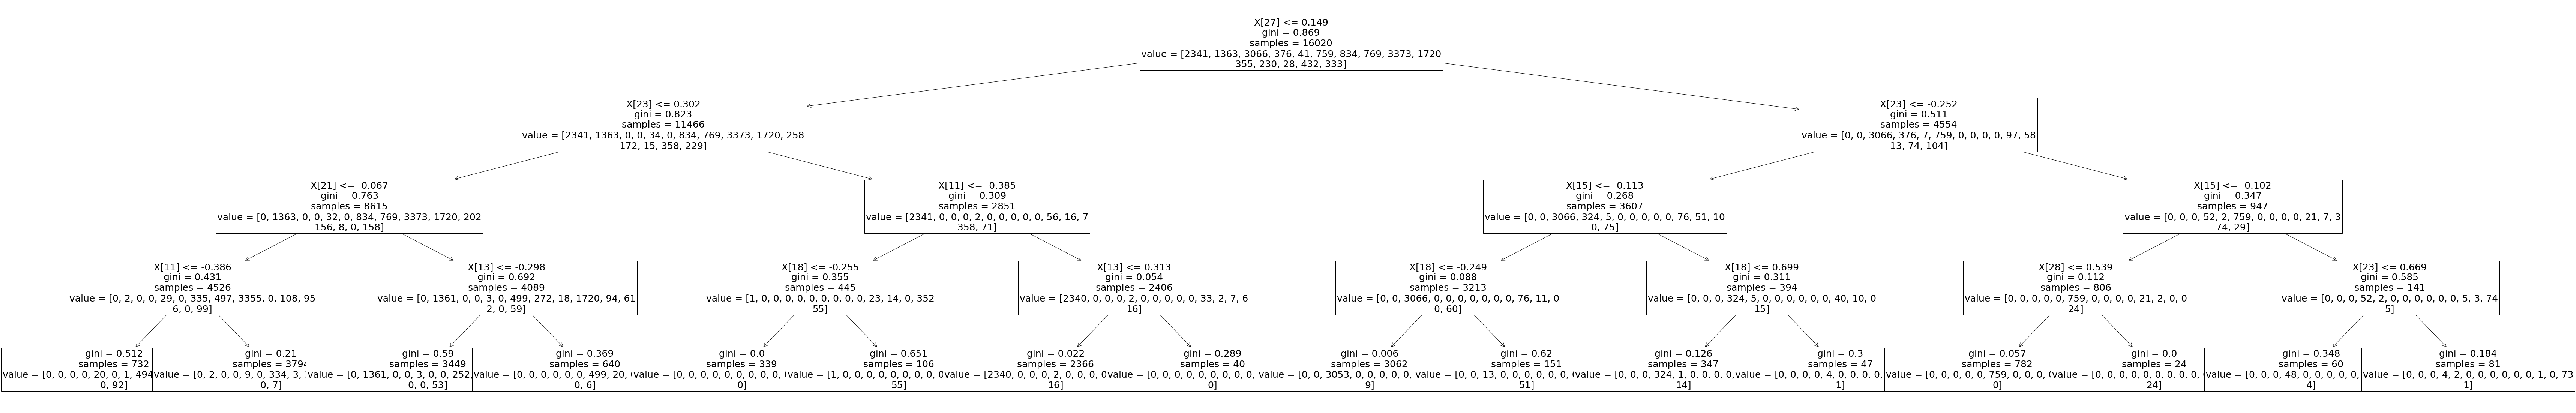

In [77]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt 

dt = DecisionTreeClassifier(random_state = 0, max_depth = 4)
m_dt = dt.fit(X_train_shap_values, y_train_pred)
plt.figure(figsize=(120,20))
tree.plot_tree(m_dt, fontsize = 25)

The overall variance is represented by the gini of 0.869 in the top node. We see that as we move down to the bottom nodes, the gini falls in each leaf. In the bottom nodes, the gini values fall to only about 0.65 maximum, but most of the gini values are beterrn 0.1 and 0.3. This means that our decision tree is able to classify these different k-means values in a way thats decreasing the SHAP variance inside each leaf. 